In [71]:
%matplotlib notebook

In [72]:
import warnings
warnings.simplefilter('ignore')

import json
import pandas as pd
import pprint
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
with open('static_data.json') as f:
    org = json.load(f)

    print(json.dumps(org, indent=4))
    static_data = pd.DataFrame(org["ProductActivity"])

{
    "ProductActivity": [
        {
            "chainId": "13099934412414038701",
            "amount": 678,
            "createdAt": "2019-07-02T21:55:19+00:00",
            "shoeSize": "6.5",
            "productId": null,
            "skuUuid": "f8dce49f-f219-4186-88aa-4f895b278a0a",
            "state": "480",
            "customerId": null,
            "localAmount": 678,
            "localCurrency": "USD"
        },
        {
            "chainId": "13095014968989026434",
            "amount": 665,
            "createdAt": "2019-07-02T19:00:39+00:00",
            "shoeSize": "6",
            "productId": null,
            "skuUuid": "4e4b259d-7a28-48fc-8361-78e7e623388d",
            "state": "480",
            "customerId": null,
            "localAmount": 665,
            "localCurrency": "USD"
        },
        {
            "chainId": "13103565995662421299",
            "amount": 510,
            "createdAt": "2019-07-02T12:08:45+00:00",
            "shoeSize": "11",
     

In [4]:
static_data.head()

amount               chainId                  createdAt customerId  \
0  678.0000  13099934412414038701  2019-07-02T21:55:19+00:00       None   
1  665.0000  13095014968989026434  2019-07-02T19:00:39+00:00       None   
2  510.0000  13103565995662421299  2019-07-02T12:08:45+00:00       None   
3  561.1757  13082893113139462361  2019-07-02T10:52:08+00:00       None   
4  561.1757  13102375004981289916  2019-07-02T10:36:08+00:00       None   

   localAmount localCurrency productId shoeSize  \
0          678           USD      None      6.5   
1          665           USD      None        6   
2          510           USD      None       11   
3          562           USD      None       10   
4          562           USD      None       10   

                                skuUuid state  
0  f8dce49f-f219-4186-88aa-4f895b278a0a   480  
1  4e4b259d-7a28-48fc-8361-78e7e623388d   480  
2  ccbd98fb-447d-4e45-b051-4ad0aa44a378   480  
3  75943bf9-02dc-4cd8-a481-030957ccbeec   480  
4  75943bf9-02dc-4cd8-a481-030957ccbeec   480

In [5]:
static_data =  static_data.rename(index=str, columns={"amount": "price", "createdAt": "purchase_date", "skuUuid": "sku", "shoeSize": "shoe_size"})
static_data.head()

price               chainId              purchase_date customerId  \
0  678.0000  13099934412414038701  2019-07-02T21:55:19+00:00       None   
1  665.0000  13095014968989026434  2019-07-02T19:00:39+00:00       None   
2  510.0000  13103565995662421299  2019-07-02T12:08:45+00:00       None   
3  561.1757  13082893113139462361  2019-07-02T10:52:08+00:00       None   
4  561.1757  13102375004981289916  2019-07-02T10:36:08+00:00       None   

   localAmount localCurrency productId shoe_size  \
0          678           USD      None       6.5   
1          665           USD      None         6   
2          510           USD      None        11   
3          562           USD      None        10   
4          562           USD      None        10   

                                    sku state  
0  f8dce49f-f219-4186-88aa-4f895b278a0a   480  
1  4e4b259d-7a28-48fc-8361-78e7e623388d   480  
2  ccbd98fb-447d-4e45-b051-4ad0aa44a378   480  
3  75943bf9-02dc-4cd8-a481-030957ccbeec   480  
4  75943bf9-02dc-4cd8-a481-030957ccbeec   480

In [6]:
static_data =  static_data.rename(index=str, columns={"amount": "price", "createdAt": "purchase_date", "skuUuid": "sku", "shoeSize": "shoe_size"})


In [7]:
new_static_data = static_data[['price', 'purchase_date', 'shoe_size', 'sku']]
new_static_data.head()

price              purchase_date shoe_size  \
0  678.0000  2019-07-02T21:55:19+00:00       6.5   
1  665.0000  2019-07-02T19:00:39+00:00         6   
2  510.0000  2019-07-02T12:08:45+00:00        11   
3  561.1757  2019-07-02T10:52:08+00:00        10   
4  561.1757  2019-07-02T10:36:08+00:00        10   

                                    sku  
0  f8dce49f-f219-4186-88aa-4f895b278a0a  
1  4e4b259d-7a28-48fc-8361-78e7e623388d  
2  ccbd98fb-447d-4e45-b051-4ad0aa44a378  
3  75943bf9-02dc-4cd8-a481-030957ccbeec  
4  75943bf9-02dc-4cd8-a481-030957ccbeec

In [8]:
static700_price = new_static_data[['price', 'shoe_size']]
static700_price.head()

price shoe_size
0  678.0000       6.5
1  665.0000         6
2  510.0000        11
3  561.1757        10
4  561.1757        10

In [9]:
with open('vanta_data.json') as f:
    org = json.load(f)

    print(json.dumps(org, indent=4))
vanta = pd.DataFrame(org["ProductActivity"])

{
    "ProductActivity": [
        {
            "chainId": "13103945066052038227",
            "amount": 310,
            "createdAt": "2019-07-02T23:59:45+00:00",
            "shoeSize": "10",
            "productId": null,
            "skuUuid": "7bc94e1a-8a03-4693-888f-84c4179a1d96",
            "state": "480",
            "customerId": null,
            "localAmount": 310,
            "localCurrency": "USD"
        },
        {
            "chainId": "13103935177565843741",
            "amount": 335,
            "createdAt": "2019-07-02T23:46:12+00:00",
            "shoeSize": "4.5",
            "productId": null,
            "skuUuid": "be1dd3d4-d6a8-42e2-9cdf-708b400fce9d",
            "state": "480",
            "customerId": null,
            "localAmount": 335,
            "localCurrency": "USD"
        },
        {
            "chainId": "13103894141084016573",
            "amount": 312,
            "createdAt": "2019-07-02T23:44:51+00:00",
            "shoeSize": "10",
    

In [10]:
vanta =  vanta.rename(index=str, columns={"amount": "price", "createdAt": "purchase_date", "skuUuid": "sku", "shoeSize": "shoe_size"})


In [11]:
new_vanta = vanta[['price', 'purchase_date', 'shoe_size', 'sku']]
new_vanta.head()

price              purchase_date shoe_size  \
0  310.0  2019-07-02T23:59:45+00:00        10   
1  335.0  2019-07-02T23:46:12+00:00       4.5   
2  312.0  2019-07-02T23:44:51+00:00        10   
3  338.0  2019-07-02T23:43:28+00:00         8   
4  328.0  2019-07-02T23:42:21+00:00       9.5   

                                    sku  
0  7bc94e1a-8a03-4693-888f-84c4179a1d96  
1  be1dd3d4-d6a8-42e2-9cdf-708b400fce9d  
2  7bc94e1a-8a03-4693-888f-84c4179a1d96  
3  72b58cc9-e8ef-4f6a-97e9-aa56b9b671cb  
4  ab6aca95-16ed-487b-b6d1-4f317715e291

In [12]:
vanta700_price = new_vanta[['price', 'shoe_size']]
vanta700_price.head()

price shoe_size
0  310.0        10
1  335.0       4.5
2  312.0        10
3  338.0         8
4  328.0       9.5

In [63]:
X = vanta700_price["shoe_size"]
y = vanta700_price["price"]
# X = X.values.reshape(-1, 1)
# y = y.values.reshape(-1, 1)
X = X.values
y = y.values
# print(X.shape, y.shape)

In [64]:
y

array([310., 335., 312., ..., 694., 600., 600.])

In [61]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[10.   4.5 10.  ... 12.  10.5 12. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [62]:
# X, y = make_regression(n_samples=1000, n_features=1, random_state=0, noise=4, bias=100.0)

In [58]:
X

array([['10'],
       ['4.5'],
       ['10'],
       ...,
       ['12'],
       ['10.5'],
       ['12']], dtype=object)

<IPython.core.display.Javascript object>


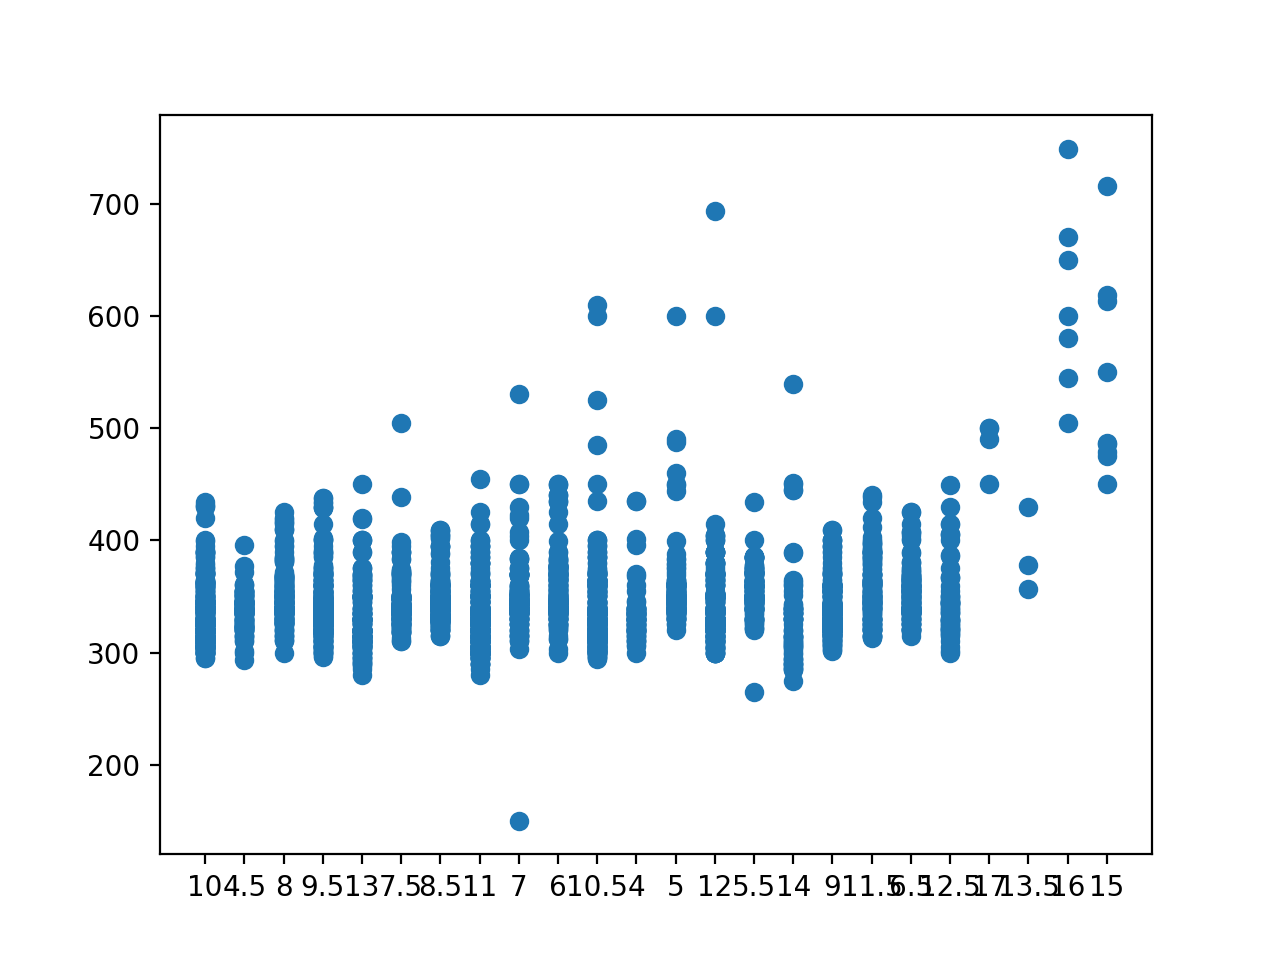

In [74]:
plt.scatter(X, y)
plt.show()

In [70]:
plt.scatter([1,2,3], [100,200,300])
plt.show()

In [69]:
y

array([310., 335., 312., ..., 694., 600., 600.])